In [10]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 


In [11]:

# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()




In [29]:
# читаем данные
travel = pd.read_csv('/content/drive/MyDrive/DATASETS/tripadvisor_review_case.csv')
print(travel.shape)
travel.head()

(980, 10)


,Average user feedback on art galleries,Average user feedback on dance clubs,Average user feedback on juice bars,Average user feedback on restaurants,Average user feedback on museums,Average user feedback on resorts,Average user feedback on parks/picnic spots,Average user feedback on beaches,Average user feedback on theaters,Average user feedback on religious institutions
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [13]:

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(travel)

# задаём модель k_means с числом кластеров 3
km = KMeans(n_clusters = 3)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
travel['cluster_km'] = labels
#print(travel.head())
a = travel.columns
#print(a)
# выводим статистику по средним значениям наших признаков по кластеру
print(travel.groupby('cluster_km').mean())


            Average user feedback on art galleries  ...  Average user feedback on religious institutions
cluster_km                                          ...                                                 
0                                         0.799548  ...                                         2.768042
1                                         0.911903  ...                                         2.531360
2                                         0.971735  ...                                         3.111577

[3 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


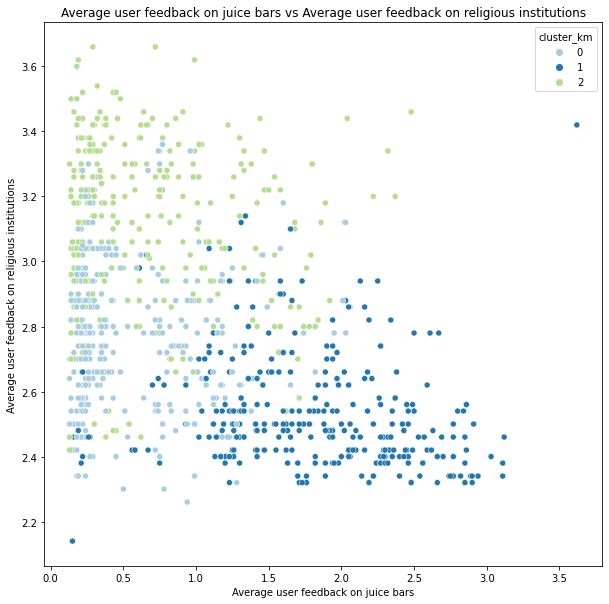

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


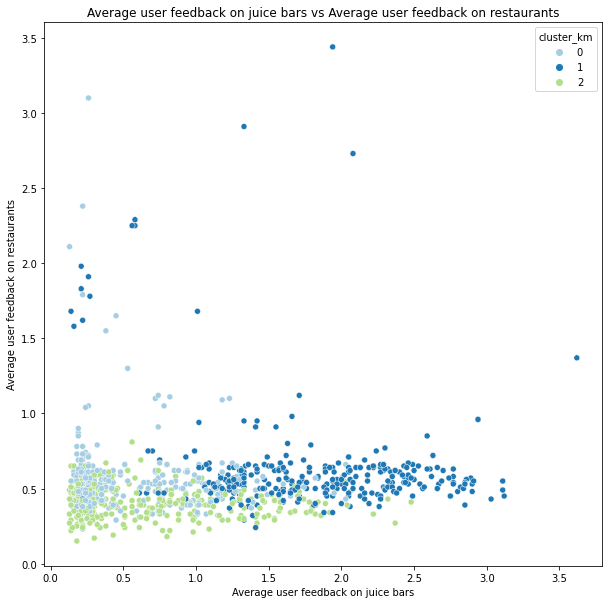

In [14]:

# отрисуем графики для пары признаков "соки" и "религия"
show_clusters_on_plot(travel, 'Average user feedback on juice bars', 
                      'Average user feedback on religious institutions',
                     'cluster_km') 

# отрисуем графики для пары признаков "соки" и "рестораны"
show_clusters_on_plot(travel, 'Average user feedback on juice bars', 
                      'Average user feedback on restaurants',
                     'cluster_km')

In [16]:
linked = linkage(x_sc, method = 'ward')

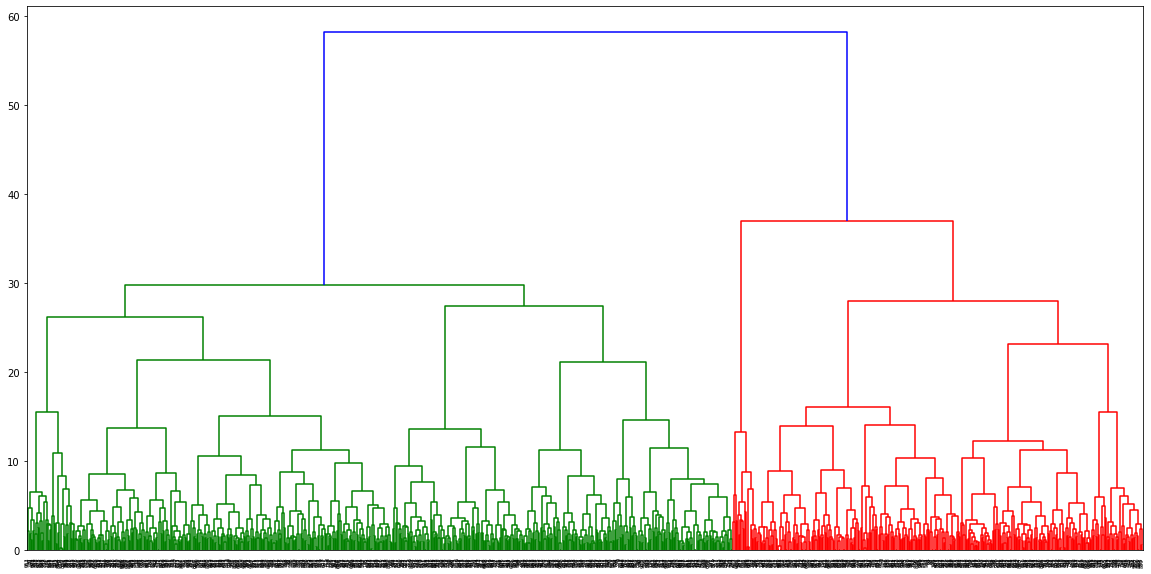

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.show()
# plt.tight_layout()
# plt.savefig('barplot.pdf', dpi=400)

In [30]:
# Метрика силуэта показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой.

from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(x_sc, labels) 

# Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация.

0.13395975980704503